<a href="https://colab.research.google.com/github/yerramsettysaimeghana/The-Sparks-Foundation-Tasks/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task-2 - Graduate Rotational Internship Program (GRIP) - The Sparks Foundation.**

## **K-Means Clustering**

From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.

####**Author** - *Sai Meghana Yerramsetty*

#### **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

####**Loading Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (2).csv


In [ ]:
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


####**Data Overview**

In [ ]:
data.shape

(150, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.drop(['Id'],axis=1,inplace=True)
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### **Plotting**

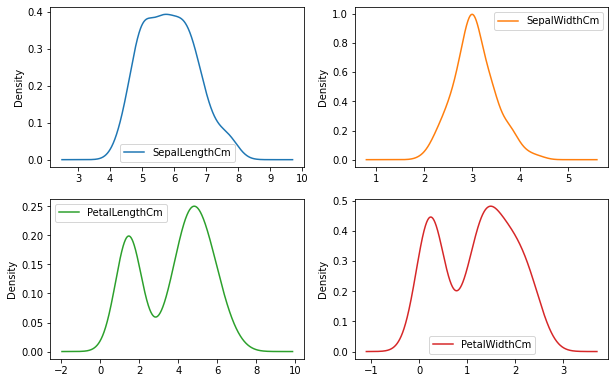

In [ ]:
data.plot(kind='density',subplots=True,layout=(3,2),sharex=False,figsize=(10,10));

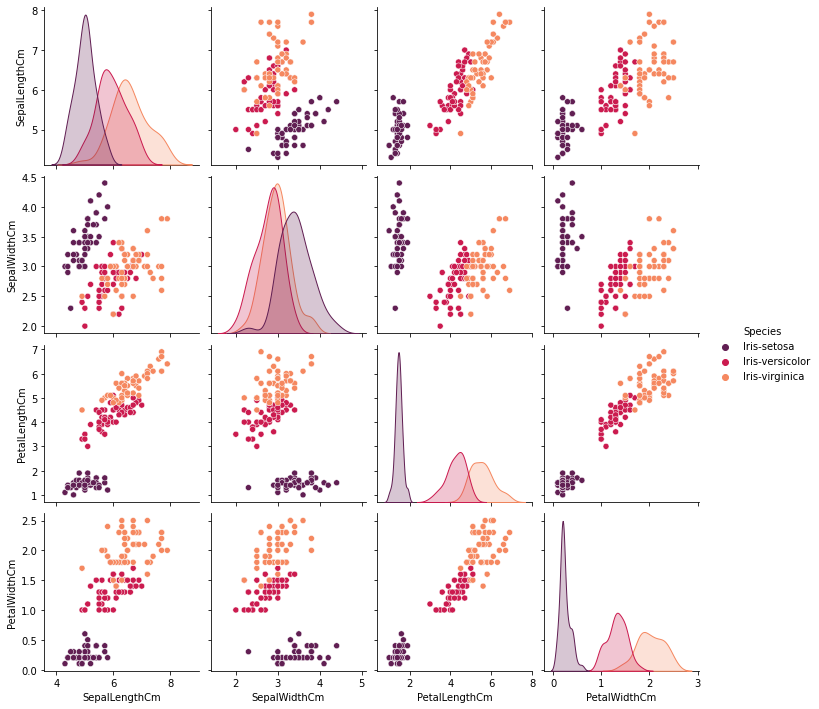

In [ ]:
sns.pairplot(data,hue='Species',palette='rocket')

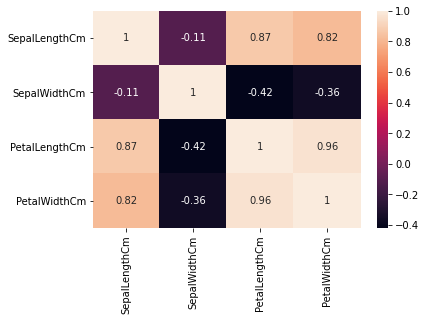

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='rocket')

k: 1 WCSS: 680.8244
k: 2 WCSS: 152.36870647733906
k: 3 WCSS: 78.94084142614602
k: 4 WCSS: 57.345409315718165
k: 5 WCSS: 46.53558205128205
k: 6 WCSS: 38.93873974358974
k: 7 WCSS: 34.19068792479662
k: 8 WCSS: 29.905374299825105
k: 9 WCSS: 27.927882157034972
k: 10 WCSS: 25.95549708624709


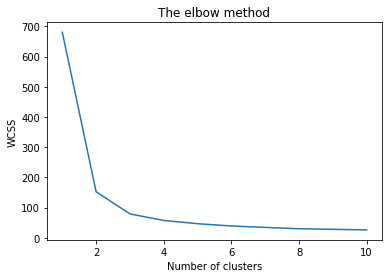

In [ ]:
x = data.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print('k:',i, 'WCSS:',kmeans.inertia_ )
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

#### **Training**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

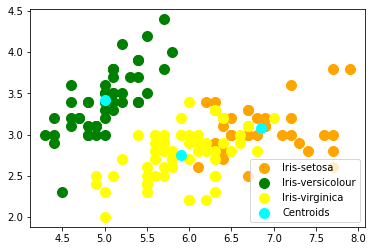

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'cyan', label = 'Centroids')

plt.legend()